# Lesson 9

In [10]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

1)	The tips.csv dataset contains data on tips collected from a restaurant. 

a.	Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

b.	Repeat part a, but broken down by time. 


In [11]:
tips = Table.read_table('Data/tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [12]:
#Find the average tip for a male by creating an array with the tip column and then calling the average Numpy function. 
mean_male_tip = np.average(tips.where("sex","Male").column("tip"))
mean_male_tip

3.0896178343949043

In [13]:
#Find the average tip for a female by creating an array with the tip column and then calling the average Numpy function. 
mean_female_tip=np.average(tips.where("sex","Female").column("tip"))
mean_female_tip

2.8334482758620685

C:\Users\C20Lindsey.Blanks\Documents\ANA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


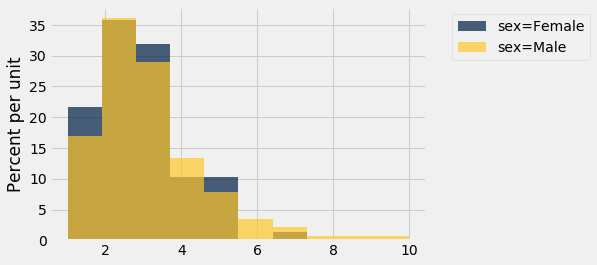

In [14]:
#Overlay the histogramn with male and female tip values. 
tips.hist("tip",group="sex")

In [15]:
tips_avg.hist("tip",group="time")

NameError: name 'tips_avg' is not defined

In [16]:
tips.select("tip","time").group("time",np.average)

time,tip average
Dinner,3.10267
Lunch,2.72809


2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [17]:
def weekday_to_num(day):
    """""""""Change day of week to number"""""""""
    
    
    
    string_num = day.replace("Mon","1").replace("Tues","2").replace("Wed","3").replace("Thur","4").replace("Fri","5").replace("Sat","6").replace("Sun","7")
    return int(string_num)

In [18]:
weekday_to_num("Thur")

4

3)	Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [19]:
tips.with_column("weekday_num",tips.apply(weekday_to_num,"day"))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4)	Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of this function will be the predicted tip amount. 

In [35]:
def est_tip(total_bill,window):
    """""""Predict the tip based on the total bill and the window"""""""
    close_points = tips.where("total_bill",are.between(total_bill-window,total_bill+window))
    return close_points.column("tip").mean()

In [36]:
est_tip(20,1)

3.143333333333333

5)	Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

In [45]:
tips = tips.with_column("Prediction",tips.apply(lambda x: est_tip(x,1), "total_bill"))
tips

total_bill,tip,sex,smoker,day,time,size,Prediction
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


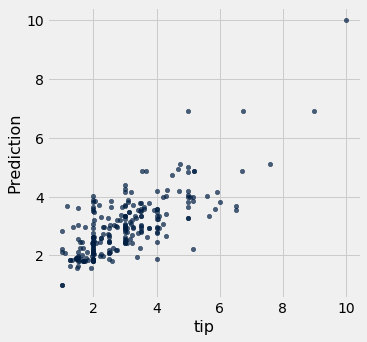

In [59]:
tips.scatter("tip","Prediction")